# ANLI - Exploratory Data Analysis

This notebook explores the ANLI dataset to understand:
- Dataset structure and size
- Label distribution
- Text length patterns
- Sample examples
- Vocabulary characteristics

In [12]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from data_loader import ANLIDataLoader

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [13]:
# Load data
loader = ANLIDataLoader()
train_df, dev_df, test_df = loader.load_data()

Loading ANLI dataset:
Train size: 45460
Dev size: 1000
Test size: 1000


In [14]:
# Display basic info
print("DATASET OVERVIEW:")

print("\nTrain Set:")
print(train_df.head())
print(f"\nShape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")

print("\nData Types:")
print(train_df.dtypes)

DATASET OVERVIEW:

Train Set:
                                    uid  \
0  245475c4-6225-4f5c-b945-e13e0e988fc8   
1  5837ee91-4527-45b7-bd03-5f0a495d71af   
2  ed5c37ab-77c5-4dbc-ba75-8fd617b19712   
3  0b54db09-9ce9-4915-91cf-6e8cc2264ae7   
4  55b3a9b0-6b5c-4fd6-a964-04156b3f574d   

                                             premise  \
0  Topi Raja Sweety Roja is a 1996 Telugu comedy ...   
1  Idris Sultan (born January 1993) is a Tanzania...   
2  Idris Sultan (born January 1993) is a Tanzania...   
3  Nantwich Town Football Club is a semi-professi...   
4  Nantwich Town Football Club is a semi-professi...   

                                          hypothesis  label reason  
0        The lead role was played by Rajendra Prasad      0         
1                 Idris Sultan was born in Tanzania.      0         
2  Idris Sultan was born in the first month of th...      0         
3  Nantwich Town Football Club is a professional ...      2         
4  Nantwich Town Football pla

LABEL DISTRIBUTION:


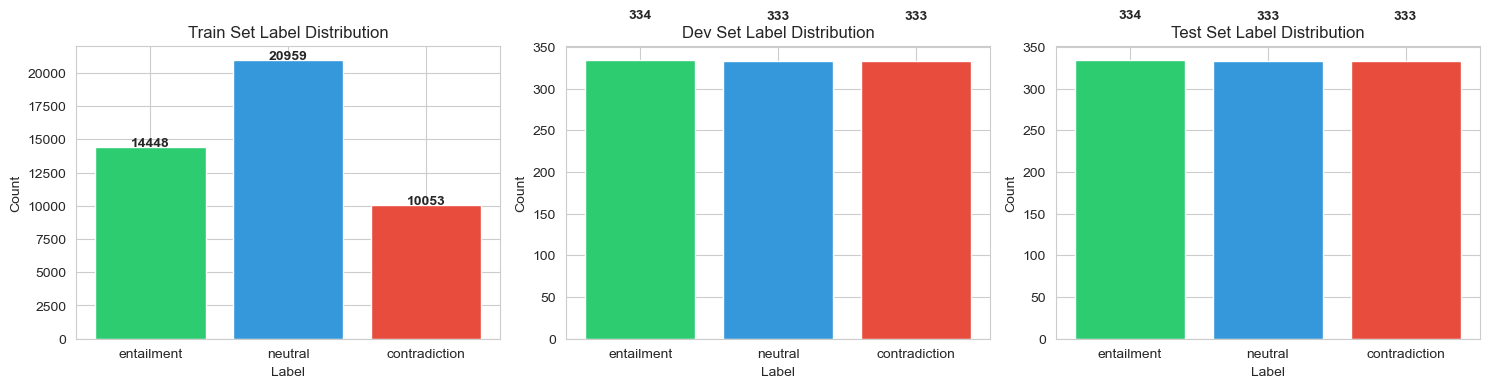


Label counts:
entailment: 14448
neutral: 20959
contradiction: 10053


In [15]:
# Label distribution
print("LABEL DISTRIBUTION:")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, df) in enumerate([("Train", train_df), ("Dev", dev_df), ("Test", test_df)]):
    label_counts = df['label'].value_counts().sort_index()
    label_names = [loader.label_map[i] for i in label_counts.index]
    
    axes[idx].bar(label_names, label_counts.values, color=['#2ecc71', '#3498db', '#e74c3c'])
    axes[idx].set_title(f'{name} Set Label Distribution')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel('Label')
    
    for i, v in enumerate(label_counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nLabel counts:")
for i in range(3):
    print(f"{loader.label_map[i]}: {(train_df['label'] == i).sum()}")

TEXT LENGTH ANALYSIS:

Premise length stats:
count    45460.000000
mean        53.997800
std          8.163158
min         33.000000
25%         47.000000
50%         54.000000
75%         60.000000
max         76.000000
Name: premise_length, dtype: float64

Hypothesis length stats:
count    45460.000000
mean         9.952178
std          5.335210
min          3.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         65.000000
Name: hypothesis_length, dtype: float64


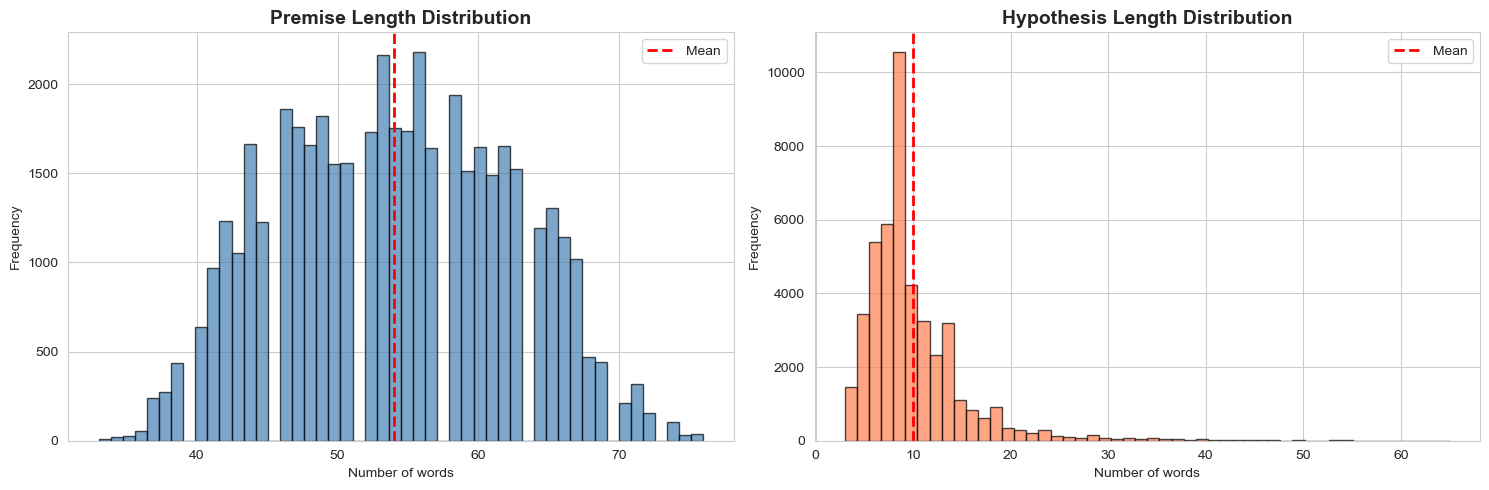

In [16]:
# Text length analysis
print("TEXT LENGTH ANALYSIS:")

train_df['premise_length'] = train_df['premise'].str.split().str.len()
train_df['hypothesis_length'] = train_df['hypothesis'].str.split().str.len()

print(f"\nPremise length stats:")
print(train_df['premise_length'].describe())
print(f"\nHypothesis length stats:")
print(train_df['hypothesis_length'].describe())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(train_df['premise_length'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Premise Length Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of words')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train_df['premise_length'].mean(), color='r', linestyle='--', linewidth=2, label='Mean')
axes[0].legend()

axes[1].hist(train_df['hypothesis_length'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title('Hypothesis Length Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of words')
axes[1].set_ylabel('Frequency')
axes[1].axvline(train_df['hypothesis_length'].mean(), color='r', linestyle='--', linewidth=2, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.savefig('../results/plots/text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Sample examples
print("SAMPLE EXAMPLES:\n")

for label in [0, 1, 2]:
    print(f"\n{loader.label_map[label].upper()} Examples:")
    samples = train_df[train_df['label'] == label].sample(2, random_state=42)
    for idx, row in samples.iterrows():
        print(f"\nPremise: {row['premise']}")
        print(f"Hypothesis: {row['hypothesis']}")


SAMPLE EXAMPLES:


ENTAILMENT Examples:

Premise: Rewire (formerly RH Reality Check, long name Reproductive Health Reality Check) is a website focused on reproductive and sexual health from a pro-reproductive rights perspective. The website began as a UN Foundation blog in 2006, and became its own nonprofit organization in January 2012. In 2016, it was renamed "Rewire".
Hypothesis: Rewire is not a for profit organization. 

Premise: Drifters is a British sitcom that stars Jessica Knappett, Lydia Rose Bewley and Lauren O'Rourke as three female friends who live in Leeds following their graduation from university. All three actresses had previously appeared together in "The Inbetweeners Movie". Four series were broadcast, between 2013 and 2016.
Hypothesis: Jessica Knappett, Lydia Rose Bewley and Lauren O'Rourke appeared together in more than one film.

NEUTRAL Examples:

Premise: The Granada Theater is a theatre located in Lower Greenville, in Dallas, TX. The theatre was built in 1946 as 

In [18]:
# Vocabulary analysis
print("VOCABULARY ANALYSIS:")

all_premise_words = ' '.join(train_df['premise']).lower().split()
all_hypothesis_words = ' '.join(train_df['hypothesis']).lower().split()

premise_vocab = set(all_premise_words)
hypothesis_vocab = set(all_hypothesis_words)

print(f"\nUnique premise words: {len(premise_vocab):,}")
print(f"Unique hypothesis words: {len(hypothesis_vocab):,}")
print(f"Overlap: {len(premise_vocab & hypothesis_vocab):,}")

premise_counter = Counter(all_premise_words)
hypothesis_counter = Counter(all_hypothesis_words)

print("\nTop 20 premise words:")
for word, count in premise_counter.most_common(20):
    print(f"  {word}: {count}")

print("\nTop 20 hypothesis words:")
for word, count in hypothesis_counter.most_common(20):
    print(f"  {word}: {count}")

VOCABULARY ANALYSIS:

Unique premise words: 29,479
Unique hypothesis words: 32,065
Overlap: 17,524

Top 20 premise words:
  the: 165093
  and: 78194
  of: 73574
  in: 68440
  is: 59219
  a: 58584
  was: 35650
  by: 33356
  on: 23694
  to: 22909
  it: 21259
  as: 19456
  for: 19448
  an: 14798
  film: 12473
  from: 12444
  he: 12306
  at: 11685
  american: 11111
  with: 10838

Top 20 hypothesis words:
  the: 29179
  in: 14853
  a: 13249
  is: 12929
  was: 12747
  of: 10171
  to: 4908
  and: 4836
  has: 3899
  by: 3578
  on: 3200
  for: 3173
  an: 2220
  not: 2190
  than: 1995
  at: 1734
  as: 1668
  from: 1576
  with: 1571
  are: 1530


In [19]:
print(f"Total training samples: {len(train_df):,}")
print(f"Label balance: {train_df['label'].value_counts().to_dict()}")
print(f"Avg premise length: {train_df['premise_length'].mean():.1f} words")
print(f"Avg hypothesis length: {train_df['hypothesis_length'].mean():.1f} words")
print(f"Vocabulary size: {len(premise_vocab):,} unique words")

Total training samples: 45,460
Label balance: {1: 20959, 0: 14448, 2: 10053}
Avg premise length: 54.0 words
Avg hypothesis length: 10.0 words
Vocabulary size: 29,479 unique words
